In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### load data into the dataframe

In [94]:
df = pd.read_csv("admissiondata.csv",index_col= 0)
df.head()

,highschool,URM,satact,GPA,essayrating,ecrating,lor,faaltu,edaccept,Did you get into your ED/REA college?,acceptance,attending,Add. Info/Context
0,"Not a feeder, Private school",Yes,Test Optional,3.8+,10,9,3,Yes (vibe check),barnard college of columbia university ED,Yes,just my ed school,my ed school!,NaN
1,"Not a feeder, Public school",No,Test Optional,3.8+,6,8,3,NaN,"ED - Wellesley, ED2 - Vassar",No,"Swarthmore College, Duke Kunshan University",Swarthmore College,"I got waitlisted at Penn, but unless I get off..."
2,"Not a feeder, Private school",No,Test Optional,3.8+,8,7,3,NaN,Cornell,No,Syracuse University\nUniversity of Texas at Da...,Syracuse University,Got a full tuition scholarship
3,"Not a feeder, Public school",Yes,Test Optional,3.8+,8,8,5,Yes (vibe check),Northwestern University,Yes,Northwestern University,Northwestern University,NaN
4,"Not a feeder, Public school",Yes,Test Optional,3.8+,9,7,4,Yes (vibe check),Macalester edI and Hamilton edII,Yes,Hamilton yayyyy,Hamilton 😋😋👍,$50 family contribution lolll


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   highschool                             56 non-null     object
 1   URM                                    59 non-null     object
 2   satact                                 59 non-null     object
 3   GPA                                    59 non-null     object
 4   essayrating                            59 non-null     int64 
 5   ecrating                               59 non-null     int64 
 6   lor                                    59 non-null     int64 
 7   faaltu                                 42 non-null     object
 8   edaccept                               51 non-null     object
 9   Did you get into your ED/REA college?  59 non-null     object
 10  acceptance                             56 non-null     object
 11  attending            

<Axes: >

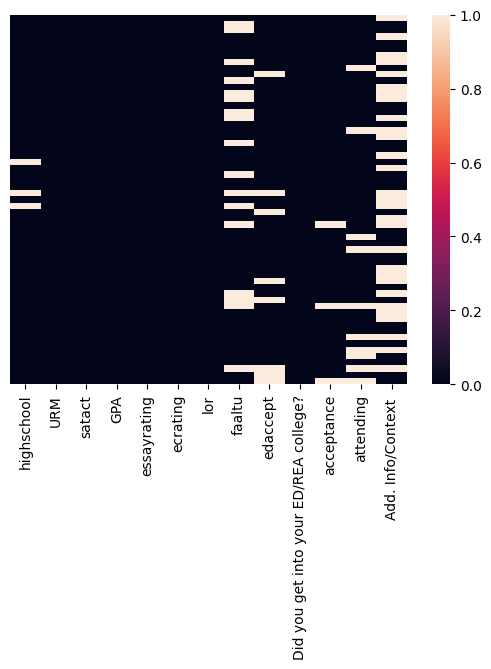

In [96]:
sns.heatmap(data = df.isna(),yticklabels=False)

In [97]:
df['highschool'].value_counts(dropna=False)
df['highschool'].fillna("Others",inplace=True)

In [98]:

df['highschool'] = df['highschool'].astype("category")
df['highschool'].value_counts()

Not a feeder, Private school    39
Not a feeder, Public school     12
Semi Feeder(NPS, DPS etc)        5
Others                           3
Name: highschool, dtype: int64

In [99]:
df['URM'].value_counts()

No          46
Yes         11
idk? lol     1
-            1
Name: URM, dtype: int64

In [100]:
others = {"idk? lol":"No","-":"No"}
df['URM'] = df['URM'].replace(others)
df['URM'].value_counts()

No     48
Yes    11
Name: URM, dtype: int64

In [101]:
df['faaltu'].value_counts(dropna=False)

Yes (vibe check)    35
NaN                 17
No                   7
Name: faaltu, dtype: int64

In [102]:
df['faaltu'].fillna("No Response",inplace=True)
df['faaltu'].astype("category")

0     Yes (vibe check)
1          No Response
2          No Response
3     Yes (vibe check)
4     Yes (vibe check)
5     Yes (vibe check)
6     Yes (vibe check)
7          No Response
8     Yes (vibe check)
9     Yes (vibe check)
10         No Response
11    Yes (vibe check)
12         No Response
13         No Response
14    Yes (vibe check)
15         No Response
16         No Response
17    Yes (vibe check)
18                  No
19    Yes (vibe check)
20         No Response
21    Yes (vibe check)
22    Yes (vibe check)
23                  No
24    Yes (vibe check)
25         No Response
26    Yes (vibe check)
27    Yes (vibe check)
28         No Response
29                  No
30         No Response
31    Yes (vibe check)
32    Yes (vibe check)
33         No Response
34                  No
35    Yes (vibe check)
36    Yes (vibe check)
37                  No
38    Yes (vibe check)
39    Yes (vibe check)
40    Yes (vibe check)
41    Yes (vibe check)
42    Yes (vibe check)
43    Yes (

In [103]:
df['edaccept'].value_counts(dropna=False)

NaN                                                     8
Cornell                                                 3
Harvard                                                 2
Brown University                                        2
Dartmouth                                               2
barnard college of columbia university ED               1
Nyuad                                                   1
WashU, University of Rochester                          1
Reed                                                    1
Duke ED                                                 1
Skidmore ED1, Richmond ED2                              1
Applied ED 2 to NEU - got rejected lol                  1
ED-UPenn                                                1
ED1: University of Rochester; ED2: Lehigh University    1
Ed washlee                                              1
N/a                                                     1
Nah                                                     1
ED II- Wellesl

In [104]:
other_college = {"N/a":"Others","N/A":"Others","nah":"Others"}

df['edaccept'] = df['edaccept'].replace(other_college)
df['edaccept'].fillna("Others",inplace=True)

<Axes: >

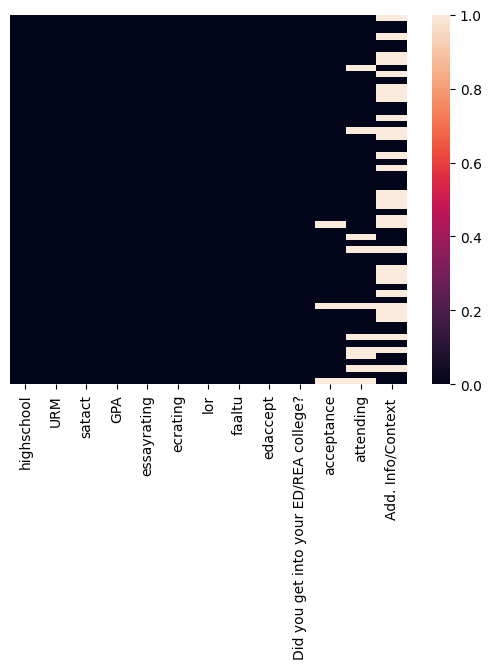

In [105]:
sns.heatmap(data = df.isna(),yticklabels=False)

In [106]:
df['attending'].value_counts(dropna=False)

NaN                                                                                            10
Purdue                                                                                          3
Syracuse University                                                                             2
Berea College                                                                                   2
my ed school!                                                                                   1
University of Alabama                                                                           1
OSU, Clemson                                                                                    1
UW Seattle                                                                                      1
University of Texas at Arlington                                                                1
Dartmouth                                                                                       1
Georgia Tech        

In [107]:
df['attending'].fillna("Not sure yet",inplace=True)

In [108]:
attending = {"Idk prob'ly Reed":"Reed" }
df['attending'] = df['attending'].replace(attending)

In [109]:
df.columns = df.columns.str.strip()

In [110]:
df['Add. Info/Context'].fillna("No Response",inplace=True)

In [111]:
df.head()

,highschool,URM,satact,GPA,essayrating,ecrating,lor,faaltu,edaccept,Did you get into your ED/REA college?,acceptance,attending,Add. Info/Context
0,"Not a feeder, Private school",Yes,Test Optional,3.8+,10,9,3,Yes (vibe check),barnard college of columbia university ED,Yes,just my ed school,my ed school!,No Response
1,"Not a feeder, Public school",No,Test Optional,3.8+,6,8,3,No Response,"ED - Wellesley, ED2 - Vassar",No,"Swarthmore College, Duke Kunshan University",Swarthmore College,"I got waitlisted at Penn, but unless I get off..."
2,"Not a feeder, Private school",No,Test Optional,3.8+,8,7,3,No Response,Cornell,No,Syracuse University\nUniversity of Texas at Da...,Syracuse University,Got a full tuition scholarship
3,"Not a feeder, Public school",Yes,Test Optional,3.8+,8,8,5,Yes (vibe check),Northwestern University,Yes,Northwestern University,Northwestern University,No Response
4,"Not a feeder, Public school",Yes,Test Optional,3.8+,9,7,4,Yes (vibe check),Macalester edI and Hamilton edII,Yes,Hamilton yayyyy,Hamilton 😋😋👍,$50 family contribution lolll


In [112]:
df['Total'] = df['essayrating'] + df['ecrating'] + df['lor']

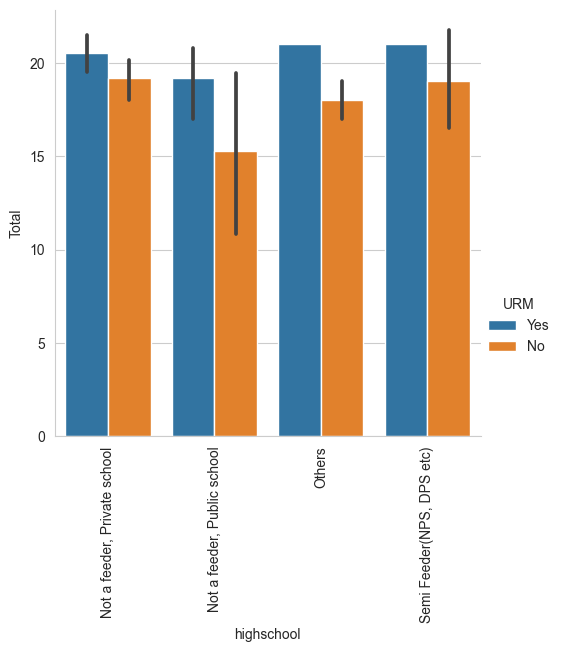

In [125]:
sns.set_style("whitegrid")
sns.catplot(data=df,x="highschool",y="Total",kind="bar",hue="URM")
plt.xticks(rotation = 90)
sns.despine()
plt.show()

<Axes: xlabel='faaltu', ylabel='count'>

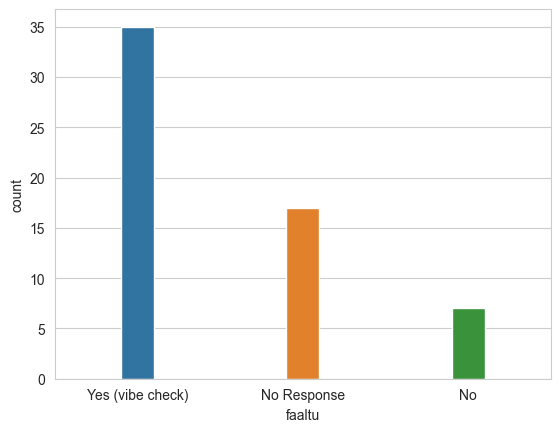

In [126]:
sns.countplot(data=df,x="faaltu",width=0.2)

<Axes: xlabel='satact', ylabel='count'>

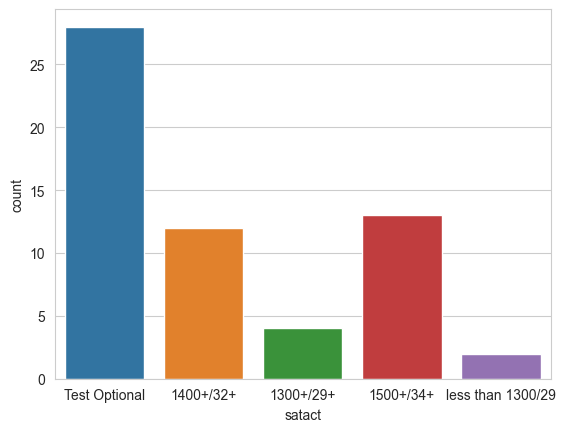

In [127]:
sns.countplot(data=df,x="satact")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Yes'),
  Text(1, 0, 'No'),
  Text(2, 0, 'Deferred then rejected'),
  Text(3, 0, 'Deferred then accepted')])

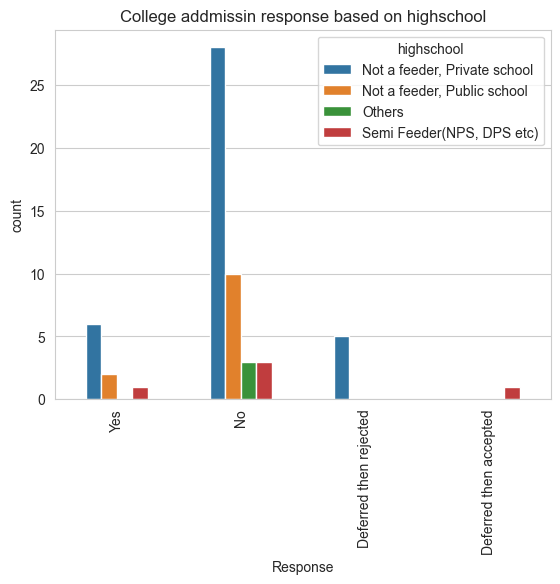

In [131]:


sns.countplot(data=df,x="Did you get into your ED/REA college?",width=0.5,hue="highschool")
plt.title("College addmissin response based on highschool")
plt.xlabel("Response")
plt.xticks(rotation = 90)

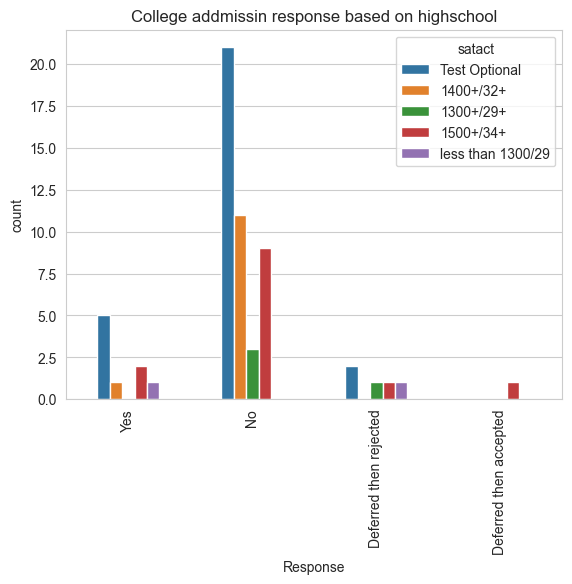

In [133]:
sns.countplot(data=df,x="Did you get into your ED/REA college?",width=0.5,hue="satact")
plt.title("College addmissin response based on highschool")
plt.xlabel("Response")
plt.xticks(rotation = 90)
plt.show()